#### Import Required Libraries

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer

#### Loading Data

In [2]:
#df = pd.read_excel('~/PycharmProjects/Diplom/data_3_22.xls', index_col=0)
# Задаем путь к файлу
file_path = "~/PycharmProjects/Diplom/старые/bigram.csv"  # замените "example.txt" на путь к вашему файлу

# Читаем данные из файла в DataFrame
df = pd.read_csv(file_path, sep=';', index_col=0)
# удалили 15,19,20,23
#ntrcns 45, 46


In [3]:
df.head()

,1_1,1_2,1_3,1_4,1_5,1_6,1_7,1_8,1_9,1_10,...,22_10,22_11,22_12,22_13,22_14,22_16,22_17,22_18,22_21,22_22
25,3655,1244,230,1921,1024,224,0,686,135,607,...,0,0,0,0,0,0,0,0,0,0
32,12403,3923,352,7182,4107,1225,95,3732,364,2561,...,75,113,106,2,0,0,0,13,0,6
35,69378,33109,1976,52348,47787,2525,1458,25719,2666,32551,...,3808,3408,5375,385,179,66,1592,821,0,703
36,6555,2035,423,10146,6983,308,356,5492,64,5308,...,690,615,956,76,24,0,336,45,0,66
38,104196,44659,5460,94823,72945,5417,1558,30986,1963,54376,...,2383,2440,2793,192,61,0,2485,344,17,136


#### Preprocess Data

In [35]:
import pandas as pd

# Предположим, что ваш DataFrame называется df
# Вычисляем дисперсии для каждой переменной
variances = df.var()
# нормально тесты при 60
dis =65
# Располагаем дисперсии в порядке убывания
sorted_variances = variances.sort_values(ascending=False)

# Получаем названия столбцов для первых 25 дисперсий
top_dis_columns = sorted_variances.head(dis).index.tolist()

# Выводим первые 25 дисперсий
print(f"Первые {dis} дисперсий в порядке убывания:")
print(sorted_variances.head(dis))

# Выводим названия столбцов для первых 25 дисперсий
print(f"\nНазвания столбцов для первых {dis} дисперсий:")
print(top_dis_columns)


Первые 65 дисперсий в порядке убывания:
17_17    3.855111e+12
1_1      2.476168e+12
17_1     1.730623e+12
1_17     1.508595e+12
4_1      6.655639e+11
             ...     
8_4      3.237676e+10
5_10     3.225071e+10
4_8      2.993349e+10
11_10    2.542327e+10
10_12    2.369359e+10
Length: 65, dtype: float64

Названия столбцов для первых 65 дисперсий:
['17_17', '1_1', '17_1', '1_17', '4_1', '1_4', '1_5', '5_1', '17_4', '11_1', '4_17', '1_11', '1_2', '1_12', '12_1', '2_1', '17_5', '17_2', '4_4', '17_11', '5_17', '11_17', '2_17', '1_10', '17_12', '10_1', '4_5', '5_4', '12_17', '4_12', '11_4', '12_4', '17_10', '4_11', '5_5', '4_2', '8_1', '2_4', '10_17', '1_8', '11_5', '12_5', '5_12', '5_11', '12_12', '5_2', '4_10', '11_12', '2_5', '10_4', '11_11', '12_11', '11_2', '17_8', '12_2', '2_11', '2_2', '2_12', '8_17', '10_5', '8_4', '5_10', '4_8', '11_10', '10_12']


In [9]:
new_df = df[top_dis_columns]
new_df

,17_17,1_1,17_1,1_17,4_1,1_4,1_5,5_1,17_4,11_1,...,17_6,8_2,2_8,6_17,8_10,10_8,1_3,17_3,8_8,3_1
25,0,3655,0,0,1949,1921,1024,1126,0,1217,...,0,393,258,0,185,88,230,0,210,200
32,0,12403,0,0,6722,7182,4107,4109,0,4584,...,0,1133,1305,0,704,952,352,0,1035,1070
35,1540,69378,6936,13952,43140,52348,47787,39868,5192,25115,...,248,7993,11615,592,7993,9107,1976,224,6441,2127
36,3486,6555,6940,2720,8024,10146,6983,4632,10662,4040,...,380,1014,2184,628,2914,2936,423,402,3003,497
38,104653,104196,147505,61801,103972,94823,72945,62327,139992,55759,...,8818,11982,11367,5838,14724,11850,5460,7355,8256,4594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,3240,162735,2025,44226,73880,79719,64098,54670,810,63892,...,405,6794,8431,2916,1768,1532,6324,0,2775,9093
309,0,467061,0,0,299566,272898,197220,189580,0,222708,...,0,23420,22635,0,11073,8255,21358,0,11325,23124
310,0,294528,0,0,105088,106880,111283,109901,0,100938,...,0,9199,10826,0,3279,4019,11817,0,3916,18135
311,0,133903,0,0,53511,48017,45657,41367,0,62131,...,0,4761,5799,0,1623,1317,10835,0,1770,14547


#### Adequacy Test (Тест на адекватность)

Существует два метода проверки факторности или адекватности выборки:
- Тест Бартлетта
- Тест Кайзера-Майера-Олкина

**Тест Бартлетта** сферичности проверяет, взаимно ли коррелируют наблюдаемые переменные, используя наблюдаемую корреляционную матрицу против единичной матрицы. Если тест оказался статистически незначимым, вам не следует использовать факторный анализ.

In [31]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(new_df)
chi_square_value, p_value

(inf, 0.0)

В этом тесте Бартлетта значение p равно 0. Тест был статистически значимым, что указывает на то, что наблюдаемая корреляционная матрица не является единичной матрицей.

**Тест Кайзера-Мейера-Олкина (КМО)** измеряет пригодность данных для факторного анализа. Он определяет адекватность каждой наблюдаемой переменной и всей модели. KMO оценивает долю дисперсии среди всех наблюдаемых переменных. Более низкая доля идентификатора больше подходит для факторного анализа. Значения KMO находятся в диапазоне от 0 до 1. Значение KMO менее 0,6 считается недостаточным.

In [32]:
# Удаляем переменные с нулевой дисперсией
#df = df.loc[:, df.var() >= 0.3]
from factor_analyzer.factor_analyzer import calculate_kmo


# Повторно оцениваем KMO
kmo_all, kmo_model = calculate_kmo(new_df)
print("KMO:", kmo_model)



KMO: 0.7164463197805124


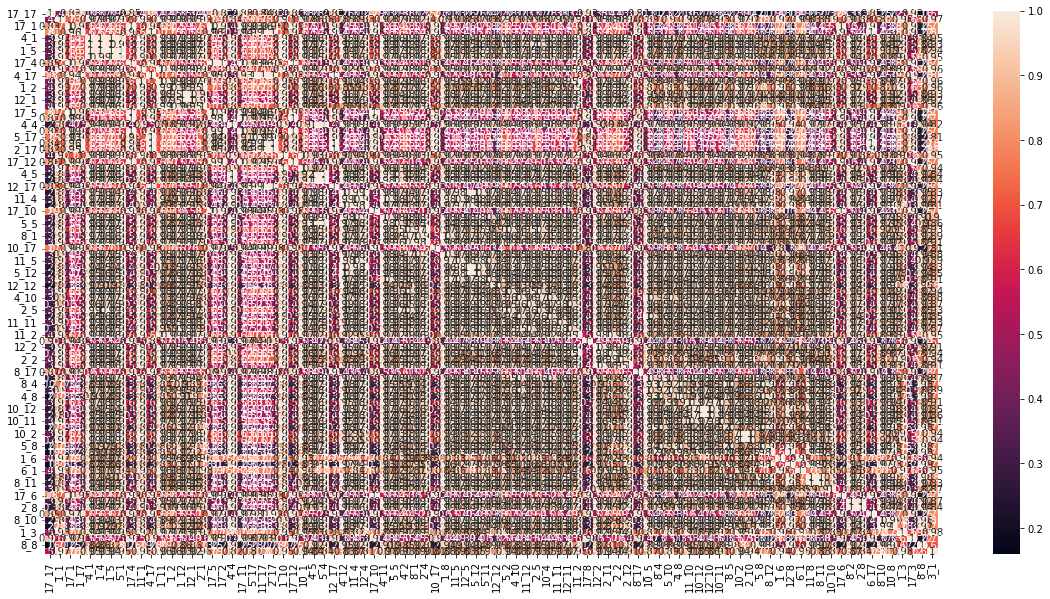

In [36]:
import seaborn as sns
plt.figure(figsize=(20,10))
c= new_df.corr()
sns.heatmap(c, annot=True);

#### Choosing the Number of Factors


Для выбора количества факторов можно использовать критерий Кайзера и осыпной график. Оба основаны на собственных значениях.

In [37]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
#eigenvalues and eigenvectors
fa.fit(new_df)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([7.12018109e+01, 1.30947869e+01, 1.46504843e+00, 8.43638044e-01,
       6.22831154e-01, 2.61365141e-01, 1.76372994e-01, 8.96399636e-02,
       5.70242529e-02, 4.47980618e-02, 3.31578741e-02, 2.61753352e-02,
       1.85187576e-02, 1.47968394e-02, 9.86790936e-03, 7.97631881e-03,
       6.02328862e-03, 5.41222931e-03, 3.99463581e-03, 3.51618641e-03,
       2.61267371e-03, 1.81253039e-03, 1.46583946e-03, 1.30668247e-03,
       1.20200224e-03, 9.36090294e-04, 7.22011205e-04, 6.78949351e-04,
       5.04768451e-04, 3.71672206e-04, 2.91845667e-04, 2.33417032e-04,
       1.98810883e-04, 1.41732876e-04, 1.15600728e-04, 8.76131525e-05,
       8.36348693e-05, 6.30007734e-05, 5.65611622e-05, 5.55799817e-05,
       4.09043214e-05, 3.86632992e-05, 3.39257874e-05, 2.68704418e-05,
       2.35480592e-05, 2.10698371e-05, 1.63423177e-05, 1.45822277e-05,
       1.22229048e-05, 1.11712458e-05, 8.87133632e-06, 8.27087534e-06,
       6.57361648e-06, 5.71682449e-06, 5.64029368e-06, 4.47297544e-06,
      

Для 5-факторов, собственные значения больше единицы. Это означает, что необходимо выбрать всего 5 факторов.

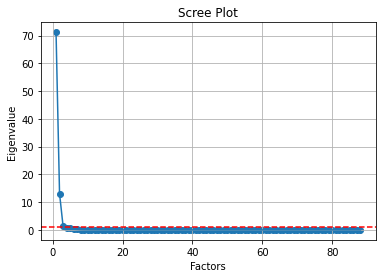

In [38]:
# Create scree plot using matplotlib
plt.scatter(range(1,new_df.shape[1]+1),ev)
plt.plot(range(1,new_df.shape[1]+1),ev)
plt.axhline(y = 1, color = 'r', linestyle = '--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Метод осыпной диаграммы рисует прямую линию для каждого фактора и его собственных значений. Число собственных значений больше единицы считается числом факторов. Красная линия ограничивает собственное значение, равное 1.

Здесь это видно только для 3-факторов, собственные значения которых больше единицы.

### Performing Factor Analysis for 5


   Original column name   Factor1   Factor2   Factor3   Factor4   Factor5
0                 17_17  0.053219  0.873251 -0.156667 -0.030780 -0.350263
1                   1_1  0.709337  0.508029  0.479914  0.008246  0.055285
2                  17_1  0.149980  0.974134  0.094901 -0.128401  0.037412
3                  1_17  0.159283  0.963826  0.123378  0.160020  0.056635
4                   4_1  0.925879  0.292423  0.232753  0.017744  0.034496
5                   1_4  0.918764  0.294759  0.253803  0.022050  0.022301
6                   1_5  0.935026  0.293129  0.185418  0.010686  0.067888
7                   5_1  0.933794  0.290089  0.190836  0.021322  0.072999
8                   4_4  0.994495  0.077073 -0.009783  0.014125  0.015988
9                   4_5  0.993549  0.071879 -0.063484  0.007331  0.044593
10                  5_4  0.994422  0.073724 -0.043304  0.016567  0.040731
11                 12_1  0.908404  0.253141  0.313783 -0.002466 -0.053350
12                 1_12  0.904031  0.2

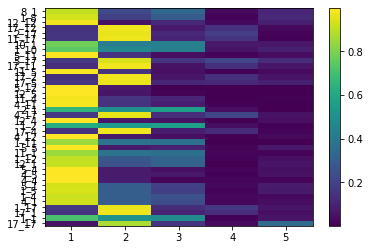

In [28]:
#from statsmodels.multivariate.factor import Factor
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors = 5, rotation = 'varimax')
fa.fit(new_df)

factors = fa.loadings_

factor1 = [values[0] for values in factors]
factor2 = [values[1] for values in factors]
factor3 = [values[2] for values in factors]
factor4 = [values[3] for values in factors]
factor5 = [values[4] for values in factors]
#factor6 = [values[5] for values in factors]
#factor7 = [values[6] for values in factors]
#factor8 = [values[7] for values in factors]
#factor9 = [values[8] for values in factors]
#factor10 = [values[9] for values in factors]


results = {'Original column name': list(new_df.columns),
          'Factor1': factor1, 
          'Factor2': factor2, 
          'Factor3': factor3, 
          'Factor4': factor4, 
          'Factor5': factor5, 
          #'Factor6': factor6, 
         # 'Factor7': factor7, 
          #'Factor8': factor8, 
          #'Factor9': factor9, 
          #'Factor10': factor10, 
          }
results = pd.DataFrame(results, columns = ['Original column name', 'Factor1', 'Factor2', 
                                           'Factor3', 'Factor4', 'Factor5', 
                                           #'Factor6','Factor7', 'Factor8', 'Factor9', 'Factor10'
                                          ])

# Get variance of each factors
stats = fa.get_factor_variance()

factor1 = [stat[0] for stat in stats]
factor2 = [stat[1] for stat in stats]
factor3 = [stat[2] for stat in stats]
factor4 = [stat[3] for stat in stats]
factor5 = [stat[4] for stat in stats]
#factor6 = [stat[5] for stat in stats]
#factor7 = [stat[6] for stat in stats]
#factor8 = [stat[7] for stat in stats]
#factor9 = [stat[8] for stat in stats]
#factor10 = [stat[9] for stat in stats]

statistics = {'': ['SS Loadings', 'Proportion Var', 'Cumulative Var'],
          'Factor1': factor1, 
          'Factor2': factor2, 
          'Factor3': factor3, 
          'Factor4': factor4, 
          'Factor5': factor5,
        #  'Factor6': factor6, 
         # 'Factor7': factor7, 
         # 'Factor8': factor8, 
         # 'Factor9': factor9, 
          #'Factor10': factor10,
           
             }

statistics = pd.DataFrame(statistics, columns = ['', 'Factor1', 'Factor2',
                                                 'Factor3', 'Factor4', 'Factor5',
                                                  #'Factor6', 'Factor7', 'Factor8', 'Factor9', 'Factor10'
                                                ])
print(results)
                                                
print(statistics)

Z=np.abs(fa.loadings_)
fig, ax = plt.subplots()
c = ax.pcolor(Z)
fig.colorbar(c, ax=ax)
ax.set_yticks(np.arange(fa.loadings_.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(fa.loadings_.shape[1])+0.5, minor=False)
ax.set_yticklabels(new_df.columns.values)
ax.set_xticklabels(np.arange(1,6))
plt.show()

### Performing Factor Analysis for 4


   Original column name   Factor1   Factor2   Factor3   Factor4
0                 17_17  0.058492  0.865683 -0.144759 -0.122197
1                   1_1  0.712033  0.499321  0.487227  0.029074
2                  17_1  0.156626  0.972936  0.102391 -0.095640
3                  1_17  0.165374  0.960886  0.131079  0.175334
4                   4_1  0.927472  0.284124  0.237471  0.031071
5                   1_4  0.920385  0.286517  0.257832  0.029643
6                   1_5  0.936578  0.284647  0.192015  0.039536
7                   5_1  0.935288  0.281439  0.197712  0.051289
8                   4_4  0.994983  0.070176 -0.007616  0.021902
9                   4_5  0.993977  0.064977 -0.059750  0.028501
10                  5_4  0.994840  0.066681 -0.039771  0.035087
11                 12_1  0.909883  0.245853  0.312890 -0.026149
12                 1_12  0.905654  0.265892  0.316631 -0.030200
13                 11_1  0.850476  0.371062  0.368777 -0.009146
14                  5_5  0.989771  0.060

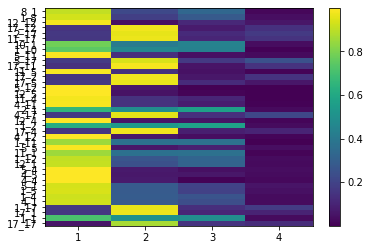

In [29]:
#from statsmodels.multivariate.factor import Factor
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors = 4, rotation = 'varimax')
fa.fit(new_df)

factors = fa.loadings_

factor1 = [values[0] for values in factors]
factor2 = [values[1] for values in factors]
factor3 = [values[2] for values in factors]
factor4 = [values[3] for values in factors]

results = {'Original column name': list(new_df.columns),
          'Factor1': factor1, 
          'Factor2': factor2, 
          'Factor3': factor3, 
          'Factor4': factor4,  
          }
results = pd.DataFrame(results, columns = ['Original column name', 'Factor1', 'Factor2',  'Factor3', 'Factor4', 
                                          ])

# Get variance of each factors
stats = fa.get_factor_variance()

factor1 = [stat[0] for stat in stats]
factor2 = [stat[1] for stat in stats]
factor3 = [stat[2] for stat in stats]
factor4 = [stat[3] for stat in stats]


statistics = {'': ['SS Loadings', 'Proportion Var', 'Cumulative Var'],
          'Factor1': factor1, 
          'Factor2': factor2, 
          'Factor3': factor3, 
          'Factor4': factor4, 
             }

statistics = pd.DataFrame(statistics, columns = ['', 'Factor1', 'Factor2',
                                                 'Factor3', 'Factor4' ])
print(results)
                                                
print(statistics)

Z=np.abs(fa.loadings_)
fig, ax = plt.subplots()
c = ax.pcolor(Z)
fig.colorbar(c, ax=ax)
ax.set_yticks(np.arange(fa.loadings_.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(fa.loadings_.shape[1])+0.5, minor=False)
ax.set_yticklabels(new_df.columns.values)
ax.set_xticklabels(np.arange(1,5))
plt.show()

- Фактор 1 имеет высокие факторные нагрузки для 
- Фактор 2 имеет высокие факторные нагрузки для 
- Фактор 3 имеет высокие факторные нагрузки для 
- Факторы 4,5 не имеют

### Performing Factor Analysis for 3


   Original column name   Factor1   Factor2   Factor3
0                 17_17  0.078780  0.881962 -0.239117
1                   1_1  0.750219  0.528134  0.394299
2                  17_1  0.247025  0.954916  0.088447
3                  1_17  0.267853  0.938631  0.134190
4                   4_1  0.871243  0.424831  0.237755
..                  ...       ...       ...       ...
83                 10_8  0.981998  0.139326 -0.017971
84                  1_3  0.708779  0.589619  0.334846
85                 17_3  0.188047  0.956586 -0.061340
86                  8_8  0.980285  0.026269 -0.120159
87                  3_1  0.710911  0.617539  0.264442

[88 rows x 4 columns]
                     Factor1    Factor2   Factor3
0     SS Loadings  56.119891  26.523116  3.021257
1  Proportion Var   0.637726   0.301399  0.034332
2  Cumulative Var   0.637726   0.939125  0.973458


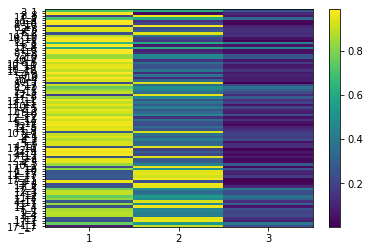

In [39]:
# Create factor analysis object and perform factor analysis using 3 factors
fa = FactorAnalyzer(n_factors = 3, rotation = 'varimax')
fa.fit(new_df)
factors_new = fa.loadings_

factor1_new = [values[0] for values in factors_new]
factor2_new = [values[1] for values in factors_new]
factor3_new = [values[2] for values in factors_new]

results_new = {'Original column name': list(new_df.columns),
          'Factor1': factor1_new, 
          'Factor2': factor2_new,
          'Factor3': factor3_new,
          }

results_new = pd.DataFrame(results_new, columns = ['Original column name', 'Factor1', 'Factor2', 'Factor3' ])
print(results_new)

# Get variance(дисп) of each factors
stats = fa.get_factor_variance()

factor1 = [stat[0] for stat in stats]
factor2 = [stat[1] for stat in stats]
factor3 = [stat[2] for stat in stats]

statistics = {'': ['SS Loadings', 'Proportion Var', 'Cumulative Var'],
          'Factor1': factor1, 
          'Factor2': factor2, 
          'Factor3': factor3, 
 
           
             }

statistics = pd.DataFrame(statistics, columns = ['', 'Factor1', 'Factor2', 'Factor3'])
print(statistics)

Z=np.abs(fa.loadings_)
fig, ax = plt.subplots()
c = ax.pcolor(Z)
fig.colorbar(c, ax=ax)
ax.set_yticks(np.arange(fa.loadings_.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(fa.loadings_.shape[1])+0.5, minor=False)
ax.set_yticklabels(new_df.columns.values)
ax.set_xticklabels(np.arange(1,4))
plt.show()

In [45]:
results_new

,Original column name,Factor1,Factor2,Factor3
0,17_17,0.078780,0.881962,-0.239117
1,1_1,0.750219,0.528134,0.394299
2,17_1,0.247025,0.954916,0.088447
3,1_17,0.267853,0.938631,0.134190
4,4_1,0.871243,0.424831,0.237755
...,...,...,...,...
83,10_8,0.981998,0.139326,-0.017971
84,1_3,0.708779,0.589619,0.334846
85,17_3,0.188047,0.956586,-0.061340
86,8_8,0.980285,0.026269,-0.120159


In [43]:
statistics

,,Factor1,Factor2,Factor3
0,SS Loadings,56.119891,26.523116,3.021257
1,Proportion Var,0.637726,0.301399,0.034332
2,Cumulative Var,0.637726,0.939125,0.973458


### Performing Factor Analysis for 2


   Original column name   Factor1   Factor2
0                 17_17  0.057069  0.838964
1                   1_1  0.787010  0.561192
2                  17_1  0.255607  0.955522
3                  1_17  0.280971  0.944813
4                   4_1  0.891521  0.438750
..                  ...       ...       ...
83                 10_8  0.974733  0.122996
84                  1_3  0.739982  0.615779
85                 17_3  0.182253  0.937674
86                  8_8  0.961425 -0.000693
87                  3_1  0.734967  0.635327

[88 rows x 3 columns]
                     Factor1    Factor2
0     SS Loadings  57.364918  26.837264
1  Proportion Var   0.651874   0.304969
2  Cumulative Var   0.651874   0.956843


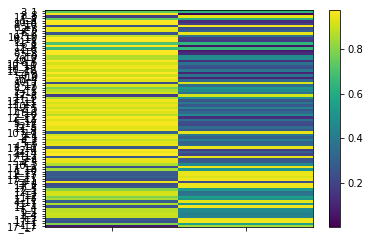

In [47]:
# Create factor analysis object and perform factor analysis using 2 factors
fa = FactorAnalyzer(n_factors = 2, rotation = 'varimax')
fa.fit(new_df)
factors_new = fa.loadings_

factor1_new = [values[0] for values in factors_new]
factor2_new = [values[1] for values in factors_new]


results_new = {'Original column name': list(new_df.columns),
          'Factor1': factor1_new, 
          'Factor2': factor2_new,
          }

results_new = pd.DataFrame(results_new, columns = ['Original column name', 'Factor1', 'Factor2'])
print(results_new)

# Get variance(дисп) of each factors
stats = fa.get_factor_variance()

factor1 = [stat[0] for stat in stats]
factor2 = [stat[1] for stat in stats]

statistics = {'': ['SS Loadings', 'Proportion Var', 'Cumulative Var'],
          'Factor1': factor1, 
          'Factor2': factor2, 
             }

statistics = pd.DataFrame(statistics, columns = ['', 'Factor1', 'Factor2'])
print(statistics)

Z=np.abs(fa.loadings_)
fig, ax = plt.subplots()
c = ax.pcolor(Z)
fig.colorbar(c, ax=ax)
ax.set_yticks(np.arange(fa.loadings_.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(fa.loadings_.shape[1])+0.5, minor=False)
ax.set_yticklabels(new_df.columns.values)
ax.set_xticklabels(np.arange(1,1))
plt.show()

2 фактора объясняют 38.41% дисперсии

In [49]:
results_new

,Original column name,Factor1,Factor2
0,17_17,0.057069,0.838964
1,1_1,0.787010,0.561192
2,17_1,0.255607,0.955522
3,1_17,0.280971,0.944813
4,4_1,0.891521,0.438750
...,...,...,...
83,10_8,0.974733,0.122996
84,1_3,0.739982,0.615779
85,17_3,0.182253,0.937674
86,8_8,0.961425,-0.000693


In [48]:
statistics

,,Factor1,Factor2
0,SS Loadings,57.364918,26.837264
1,Proportion Var,0.651874,0.304969
2,Cumulative Var,0.651874,0.956843


In [32]:
#from statsmodels.multivariate.factor import Factor
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors = 4, rotation = 'varimax')
fa.fit(df)

KeyboardInterrupt: 

Отбросьте сообщества
Сообщества переменных/функций проверяются, чтобы убедиться, что переменные четко определены решением. Сообщества указывают процент дисперсии переменной, которая перекрывает дисперсию факторов. В идеале нам следует исключить переменные с низкой общностью, например, исключить переменные с общностью <0,2. Если общность низкая, это говорит о том, что переменная имеет мало общего с другими переменными и, вероятно, подлежит исключению.

In [ ]:
communalities = pd.DataFrame(fa.get_communalities(), index=df.columns)
communalities[communalities[0]<0.3]

In [ ]:
# Drop low communalities
df.drop(columns=['Часть фразеологизма','Звукоподражательное слово','Старославянизм'], inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(new_df)
df_scaled

df_scaled = scaler.fit_transform(new_df)

Factor Analysis with 4 factors

In [ ]:
fa = FactorAnalyzer(n_factors=4 )
fa.fit(df_scaled)

pd.DataFrame(fa.loadings_,index=new_df.columns)

Как правило, интерпретируются только переменные с нагрузкой 0,32 и выше. Чем больше нагрузка, тем в большей степени vrialbe является чистой мерой фактора. Комри и Ли (1992) предполагают, что нагрузки:

->71% (50% перекрывающаяся дисперсия) считаются отличными;
->63% (40% перекрывающаяся дисперсия) очень хорошо;
->55% (30% перекрывающаяся дисперсия) хорошо;
->45% (20% перекрывающейся дисперсии) удовлетворительно;
-<32% (10% перекрывающаяся дисперсия) плохо;

In [ ]:
Z=np.abs(fa.loadings_)
fig, ax = plt.subplots()
c = ax.pcolor(Z)
fig.colorbar(c, ax=ax)
ax.set_yticks(np.arange(fa.loadings_.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(fa.loadings_.shape[1])+0.5, minor=False)
ax.set_yticklabels(new_df.columns.values)
ax.set_xticklabels(np.arange(1,5))
plt.show()

- Фактор 1 имеет высокие факторные нагрузки для 
- Фактор 2 имеет высокие факторные нагрузки для 
- Фактор 3 имеет высокие факторные нагрузки для 


In [ ]:
pd.DataFrame(fa.get_factor_variance(), index=['SS Loadings','Proportion Var','Cum Var'])

Five factors explain 74.18% of the variance

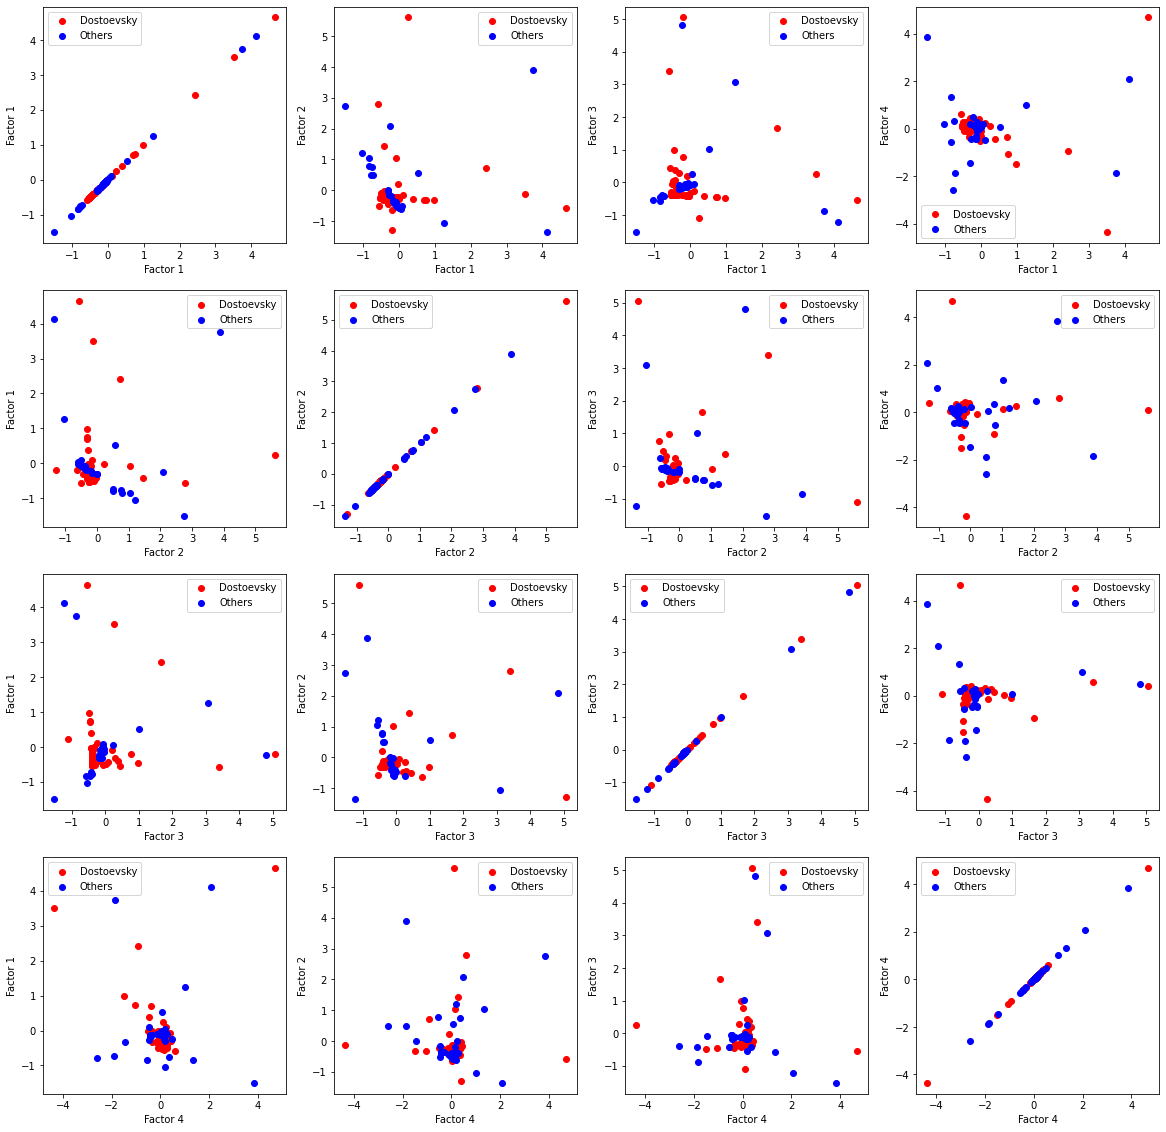

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

# Разбиваем таблицу на две части
data1 = new_df.head(48)
data2 = new_df.tail(new_df.shape[0] - 48)

# Производим факторный анализ
scaler = StandardScaler()
data1_scaled = scaler.fit_transform(data1)
data2_scaled = scaler.fit_transform(data2)

fa = FactorAnalysis(n_components=4, rotation = 'varimax')
fa.fit(data1_scaled)
data1_factors = fa.transform(data1_scaled)

fa.fit(data2_scaled)
data2_factors = fa.transform(data2_scaled)


#И наконец, построим точечную диаграмму для всех возможных комбинаций факторов:

fig, axs = plt.subplots(4, 4, figsize=(20, 20))

for i in range(4):
    for j in range(4):
        axs[i, j].scatter(data1_factors[:, i], data1_factors[:, j], c='r', label='Dostoevsky')
        axs[i, j].scatter(data2_factors[:, i], data2_factors[:, j], c='b', label='Others')
        axs[i, j].set_xlabel(f'Factor {i+1}')
        axs[i, j].set_ylabel(f'Factor {j+1}')
        axs[i, j].legend()

plt.show()



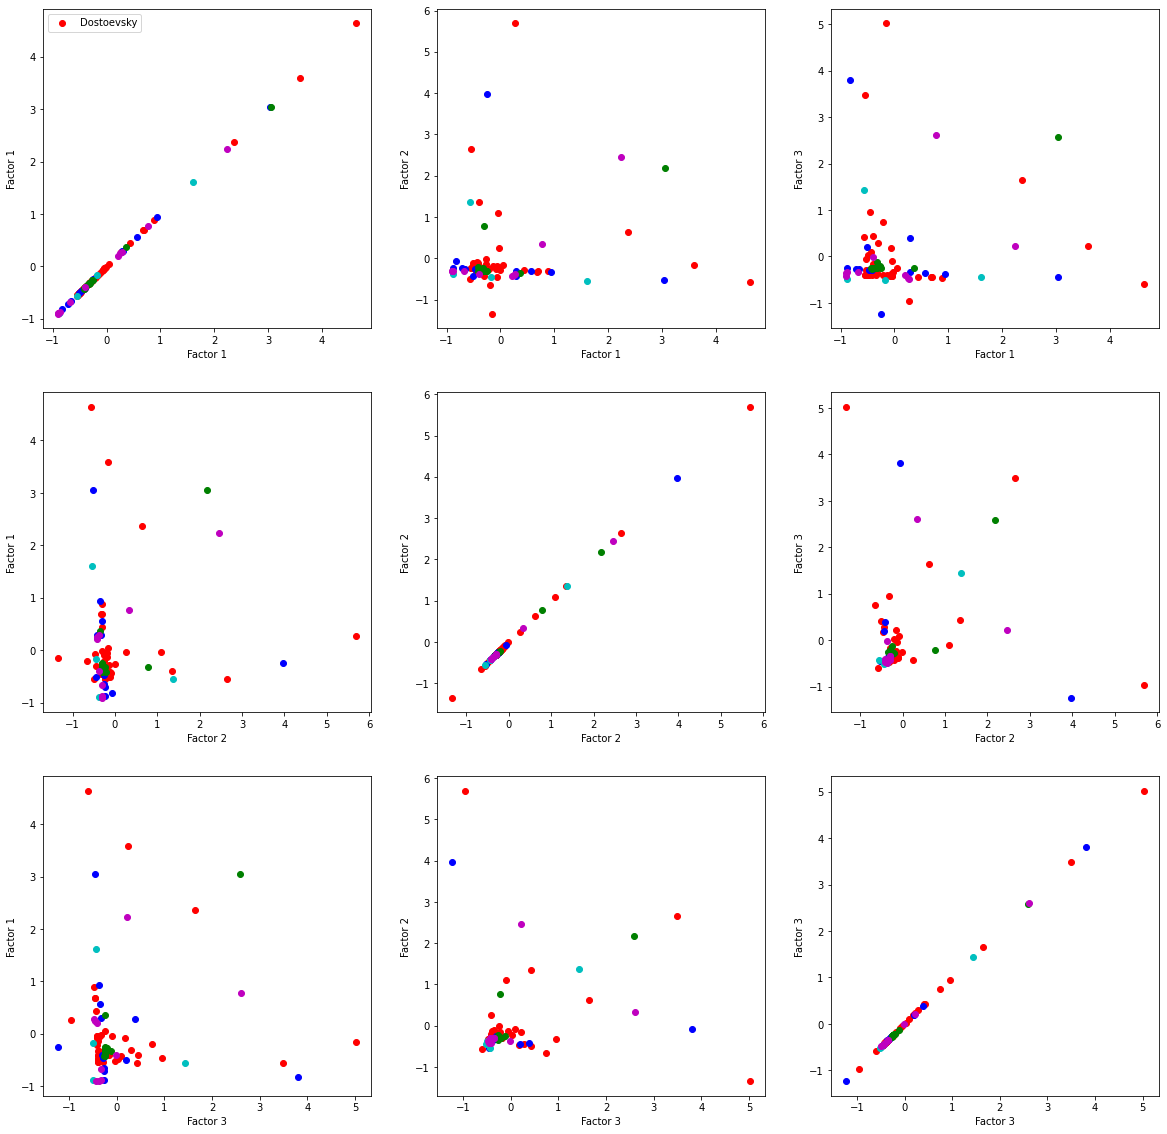

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

# Предположим, что индексы для разделения data2 заданы следующим образом
indices_1 = [146, 151, 152, 180, 286, 287, 288, 289, 290, 308, 309, 310, 311, 312]  # Мещерского
indices_2 = [24, 26, 37, 39, 237, 238, 239, 245, 246, 247, 248, 306]  # других авторов
indices_3 = [89, 90, 177, 198]  # А.Григорьева
indices_4 = [85, 116, 117, 125, 199, 292, 293, 294, 295, 296]  # Н.Н.Страхова
# indices_5 =  [111, 114, 115, 141, 314]  # М.М.Достоевского

# Разбиваем таблицу на две части
data1 = new_df.head(48)
data2 = new_df.tail(new_df.shape[0] - 48)

# Производим факторный анализ для data1
scaler = StandardScaler()
data1_scaled = scaler.fit_transform(data1)

fa = FactorAnalysis(n_components=3, rotation='varimax')
fa.fit(data1_scaled)
data1_factors = fa.transform(data1_scaled)

# Инициализируем фигуру для построения графика
fig, axs = plt.subplots(3, 3, figsize=(20, 20))

# Цвета для различных поддатасетов data2
colors = ['b', 'g', 'c', 'm']  # , 'y'

# Добавляем точки для data1 на график
for i in range(3):
    for j in range(3):
        axs[i, j].scatter(data1_factors[:, i], data1_factors[:, j], c='r', label='Dostoevsky' if i == 0 and j == 0 else "")
        axs[i, j].set_xlabel(f'Factor {i + 1}')
        axs[i, j].set_ylabel(f'Factor {j + 1}')
        if i == 0 and j == 0:
            axs[i, j].legend()

# Добавляем точки для каждого поддатасета data2 на график
for k, indices in enumerate([indices_1, indices_2, indices_3, indices_4]):  # , indices_5
    data2_subset = data2.loc[indices]
    if not data2_subset.empty:
        data2_subset_scaled = scaler.fit_transform(data2_subset)
        data2_subset_factors = fa.transform(data2_subset_scaled)
        for i in range(3):
            for j in range(3):
                axs[i, j].scatter(data2_subset_factors[:, i], data2_subset_factors[:, j], c=colors[k], label=f'Others {k+1}' if i == 0 and j == 0 else "")

# To ensure all legends are added correctly, we do it outside the loop once
#handles, labels = axs[0, 0].get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper left')

plt.show()



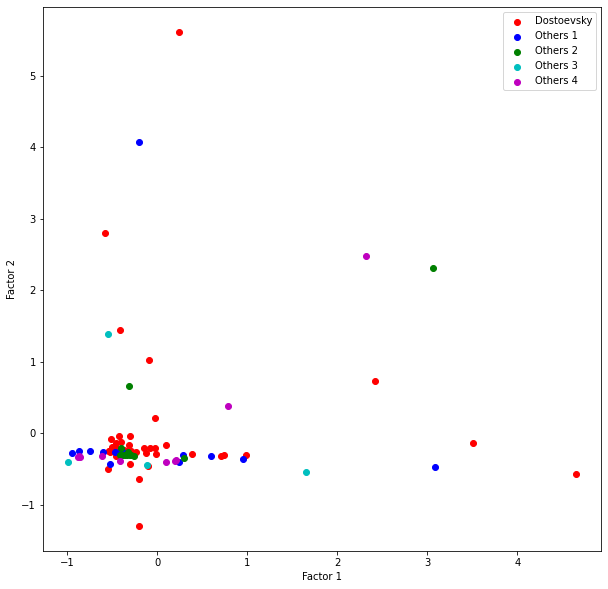

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

# Предположим, что индексы для разделения data2 заданы следующим образом
indices_1 = [146, 151, 152, 180, 286, 287, 288, 289, 290, 308, 309, 310, 311, 312]  # Мещерского
indices_2 = [24, 26, 37, 39, 237, 238, 239, 245, 246, 247, 248, 306]  # других авторов
indices_3 = [89, 90, 177, 198]  # А.Григорьева
indices_4 = [85, 116, 117, 125, 199, 292, 293, 294, 295, 296]  # Н.Н.Страхова
# indices_5 =  [111, 114, 115, 141, 314]  # М.М.Достоевского

# Разбиваем таблицу на две части
data1 = new_df.head(48)
data2 = new_df.tail(new_df.shape[0] - 48)

# Производим факторный анализ для data1
scaler = StandardScaler()
data1_scaled = scaler.fit_transform(data1)

fa = FactorAnalysis(n_components=4, rotation='varimax')
fa.fit(data1_scaled)
data1_factors = fa.transform(data1_scaled)

# Инициализируем фигуру для построения графика
fig, ax = plt.subplots(figsize=(10, 10))

# Цвета для различных поддатасетов data2
colors = ['b', 'g', 'c', 'm']  # , 'y'

# Добавляем точки для data1 на график
ax.scatter(data1_factors[:, 0], data1_factors[:, 1], c='r', label='Dostoevsky')
ax.set_xlabel('Factor 1')
ax.set_ylabel('Factor 2')

# Добавляем точки для каждого поддатасета data2 на график
for k, indices in enumerate([indices_1, indices_2, indices_3, indices_4]):  # , indices_5
    data2_subset = data2.loc[indices]
    if not data2_subset.empty:
        data2_subset_scaled = scaler.fit_transform(data2_subset)
        data2_subset_factors = fa.transform(data2_subset_scaled)
        ax.scatter(data2_subset_factors[:, 0], data2_subset_factors[:, 1], c=colors[k], label=f'Others {k+1}')

# Добавляем легенду
ax.legend(loc='upper right')

plt.show()



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import FactorAnalysis

# данных для двух датасетов с разным количеством строк
dataset1 = new_df.head(48)
dataset2 = new_df.tail(new_df.shape[0] - 48)

# Создание датафреймов из сгенерированных данных
df1 = pd.DataFrame(dataset1, columns=['Factor1', 'Factor2', 'Factor3', 'Factor4'])
df2 = pd.DataFrame(dataset2, columns=['Factor1', 'Factor2', 'Factor3', 'Factor4'])

# Факторный анализ для каждого датасета
fa1 = FactorAnalysis(n_components=4, rotation='varimax')
fa2 = FactorAnalysis(n_components=4, rotation='varimax')
transformed_data1 = fa1.fit_transform(dataset1)
transformed_data2 = fa2.fit_transform(dataset2)

# Приведение размеров датасетов к одному размеру
min_len = min(len(dataset1), len(dataset2))
dataset1 = dataset1[:min_len]
dataset2 = dataset2[:min_len]

from itertools import combinations

# Объединение датасетов
X = np.concatenate([dataset1, dataset2])
y = np.array([0] * min_len + [1] * min_len)  # Метки классов: 0 для dataset1, 1 для dataset2

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=1)#test_size=0.33, random_state=42



print(f'Kernel: linear')
#балансом, используя гиперпараметр C: 
#меньшее значение C ведет к более широкой полосе, но большему числу нарушений зазора. 
svm_model = SVC(kernel='linear', C=0.01)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


def print_reflected_indices(X_test, y_test, y_pred):
    reflected_indices = {}
    for idx, (test_point, pred_label) in enumerate(zip(X_test, y_pred)):
        true_label = y_test[idx]
        if pred_label == true_label:
            if true_label not in reflected_indices:
                reflected_indices[true_label] = [idx]
            else:
                reflected_indices[true_label].append(idx)
    for label, indices in reflected_indices.items():
        print(f'Points reflected from dataset {label}: {indices}')

# Построение графиков SVM с разными цветами для датасетов
plt.figure(figsize=(12, 10))
pairs = list(combinations(range(4), 2))
for i, pair in enumerate(pairs):
    plt.subplot(3, 4, i + 1)
    svm_model = SVC(kernel='linear')
    svm_model.fit(X_train[:, pair], y_train)
    xx, yy = np.meshgrid(np.linspace(X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1, 500),
                         np.linspace(X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1, 500))
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    y_pred = svm_model.predict(X_test[:, pair])
    accuracy = accuracy_score(y_test, y_pred)

    print(f'Factors {pair[0]+1} and {pair[1]+1}, Accuracy: {accuracy:.2f}')
    print_reflected_indices(X_test[:, pair], y_test, y_pred)

    # Отображение границ решения и обучающих точек
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)
    plt.scatter(X_train[:, pair[0]], X_train[:, pair[1]], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.scatter(X_test[:, pair[0]], X_test[:, pair[1]], c=y_test, cmap=plt.cm.coolwarm,marker='x',  s=100)
    plt.xlabel(f'Factor {pair[0]+1}')
    plt.ylabel(f'Factor {pair[1]+1}')
    plt.title(f'Factors {pair[0]+1} and {pair[1]+1}, Accuracy: {accuracy:.2f}')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

plt.tight_layout()
plt.show()

# Вывод определенных строк из датасета
#def print_selected_rows(dataset, indices):
    #selected_rows = dataset.iloc[indices]
    #print(selected_rows)

# Вставить нужные строчки, выбрав 
print("Выбранные строки из датасета 1:")
#print_selected_rows(df1, [1, 2, 8, 10, 12, 15, 16, 17, 18, 21])

print("Выбранные строки из датасета 2:")
#print_selected_rows(df2,  [0, 3, 4, 5, 6, 7, 9, 11, 13, 14, 22])



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import FactorAnalysis

# данных для двух датасетов с разным количеством строк
dataset1 = new_df.head(48)
dataset2 = new_df.tail(new_df.shape[0] - 48)

# Создание датафреймов из сгенерированных данных
df1 = pd.DataFrame(dataset1, columns=['Factor1', 'Factor2'])
df2 = pd.DataFrame(dataset2, columns=['Factor1', 'Factor2'])

# Факторный анализ для каждого датасета
fa1 = FactorAnalysis(n_components=2, rotation='varimax')
fa2 = FactorAnalysis(n_components=2, rotation='varimax')
transformed_data1 = fa1.fit_transform(dataset1)
transformed_data2 = fa2.fit_transform(dataset2)

# Приведение размеров датасетов к одному размеру
min_len = min(len(dataset1), len(dataset2))
dataset1 = dataset1[:min_len]
dataset2 = dataset2[:min_len]

from itertools import combinations

# Объединение датасетов
X = np.concatenate([dataset1, dataset2])
y = np.array([0] * min_len + [1] * min_len)  # Метки классов: 0 для dataset1, 1 для dataset2

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=1)#test_size=0.33, random_state=42



print(f'Kernel: linear')
#балансом, используя гиперпараметр C: 
#меньшее значение C ведет к более широкой полосе, но большему числу нарушений зазора. 
svm_model = SVC(kernel='linear', C=0.01)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


def print_reflected_indices(X_test, y_test, y_pred):
    reflected_indices = {}
    for idx, (test_point, pred_label) in enumerate(zip(X_test, y_pred)):
        true_label = y_test[idx]
        if pred_label == true_label:
            if true_label not in reflected_indices:
                reflected_indices[true_label] = [idx]
            else:
                reflected_indices[true_label].append(idx)
    for label, indices in reflected_indices.items():
        print(f'Points reflected from dataset {label}: {indices}')

# Построение графиков SVM с разными цветами для датасетов
plt.figure(figsize=(12, 10))
pairs = list(combinations(range(2), 2))
for i, pair in enumerate(pairs):
    plt.subplot(1, 2, i + 1)
    svm_model = SVC(kernel='linear')
    svm_model.fit(X_train[:, pair], y_train)
    xx, yy = np.meshgrid(np.linspace(X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1, 500),
                         np.linspace(X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1, 500))
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    y_pred = svm_model.predict(X_test[:, pair])
    accuracy = accuracy_score(y_test, y_pred)

    print(f'Factors {pair[0]+1} and {pair[1]+1}, Accuracy: {accuracy:.2f}')
    print_reflected_indices(X_test[:, pair], y_test, y_pred)

    # Отображение границ решения и обучающих точек
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)
    plt.scatter(X_train[:, pair[0]], X_train[:, pair[1]], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.scatter(X_test[:, pair[0]], X_test[:, pair[1]], c=y_test, cmap=plt.cm.coolwarm,marker='x',  s=100)
    plt.xlabel(f'Factor {pair[0]+1}')
    plt.ylabel(f'Factor {pair[1]+1}')
    plt.title(f'Factors {pair[0]+1} and {pair[1]+1}, Accuracy: {accuracy:.2f}')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

plt.tight_layout()
plt.show()

# Вывод определенных строк из датасета
#def print_selected_rows(dataset, indices):
    #selected_rows = dataset.iloc[indices]
    #print(selected_rows)

# Вставить нужные строчки, выбрав 
print("Выбранные строки из датасета 1:")
#print_selected_rows(df1, [1, 2, 8, 10, 12, 15, 16, 17, 18, 21])

print("Выбранные строки из датасета 2:")
#print_selected_rows(df2,  [0, 3, 4, 5, 6, 7, 9, 11, 13, 14, 22])

